In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [40]:
df = pd.read_csv("hr_data.csv")
df

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


### Кластеризація по `Age` та `Productivity` використовуючи алгоритм `K-means`.

In [41]:
df_age_productivity = df.iloc[:, [1, 4]]
df_age_productivity

,Age,Productivity (%)
0,25,57
1,59,55
2,30,87
3,26,53
4,43,3
...,...,...
195,29,32
196,26,45
197,22,36
198,36,96


In [42]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(df_age_productivity)

df['cluster'] = kmeans.fit_predict(df_age_productivity)

# kmeans.cluster_centers_
# # kmeans.predict([[0, 0], [20, 95]])

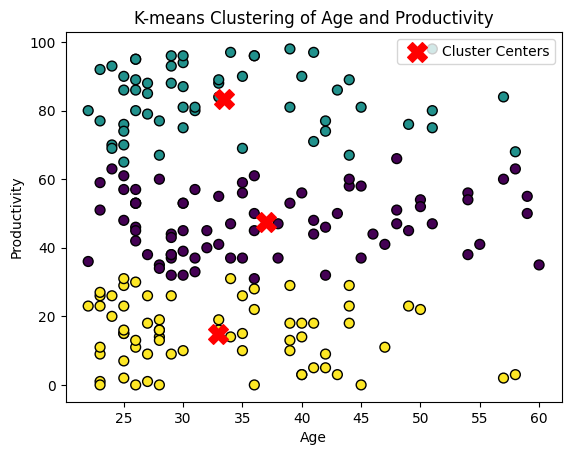

In [43]:
plt.scatter(df['Age'], df['Productivity (%)'], c=df['cluster'], cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')

plt.xlabel('Age')
plt.ylabel('Productivity')
plt.title('K-means Clustering of Age and Productivity')

plt.legend()
plt.show()